# LMSアルゴリズムの実装

4点移動平均フィルタのシステムについて、入力信号（白色雑音）と出力信号を用いてLMSアルゴリズムにより逐次同定を行う

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

In [2]:
class Plant(object):
    """ 同定対象のシステム（4点移動平均フィルタ）を記述しているクラス
    """
    def __init__(self):
        self.k0 = 0.0
        self.k1 = 0.0
        self.k2 = 0.0
        self.k3 = 0.0
        return
    def get(self, signal):
        self.k3 = self.k2
        self.k2 = self.k1
        self.k1 = self.k0
        self.k0 = signal
        return ((self.k0 + self.k1 + self.k2 + self.k3) * 0.25) + np.random.normal(loc=0,scale = 0.1)

In [3]:
class LeastMeanSquare(object):
    """ LMSアルゴリズムを実装しているクラス
    """
    def __init__(self, step_size):
        self.len = 4
        self.regressor = np.zeros(self.len)
        self.parameter = np.zeros(self.len)
        self.step_size = step_size
        return
    
    def next(self, sig_in, sig_out):
        self.regressor[1:] = self.regressor[0:-1]
        self.regressor[0] = sig_in
        error = (self.regressor @ self.parameter) - sig_out
        self.parameter = self.parameter - (2 * self.step_size * self.regressor * error)
        return

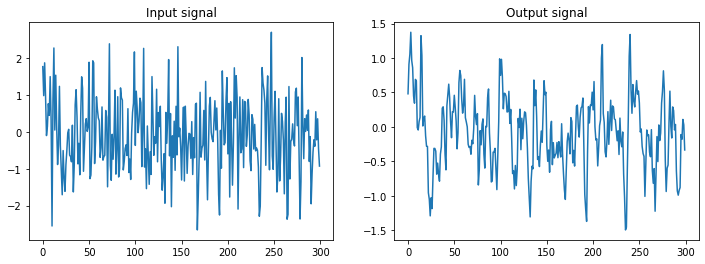

In [4]:
plant = Plant()
time = np.arange(300)
input_signal_array = []
output_signal_array = []
for i in time:
    input_signal = np.random.normal()
    output_signal = plant.get(input_signal)
    input_signal_array.append(input_signal)
    output_signal_array.append(output_signal)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time, input_signal_array)
plt.title("Input signal")
plt.subplot(1, 2, 2)
plt.plot(time, output_signal_array)
plt.title("Output signal")
plt.show()

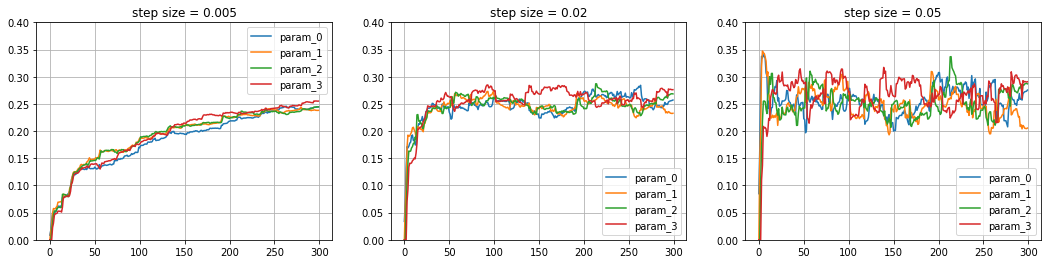

In [5]:
step_size_list = [0.005, 0.02, 0.05]
plt.figure(figsize=(18, 4))
for j, ss in enumerate(step_size_list):
    lms = LeastMeanSquare(step_size=ss)
    log = []
    for t in time:
        lms.next(input_signal_array[t], output_signal_array[t])
        log.append(lms.parameter)
        
    plt.subplot(1, len(step_size_list), j+1)
    for i in range(lms.parameter.shape[0]):
        plt.plot(time, [log[j][i] for j in time], label="param_" + str(i))
    plt.title("step size = " + str(ss))
    plt.grid(True)
    plt.legend()
    plt.ylim(0, 0.4)
plt.show()